In [2]:
import pandas as pd
import numpy as np


In [3]:
final_diaries = pd.read_csv('../../data/tidy/paired_data/merged_cgm_iob_exercise_data.csv')
cgm_ins = pd.read_csv('../../data/tidy/paired_data/merged_cgm_iob_data.csv')  # Save if needed

In [4]:
cgm_ins['time'] = pd.to_datetime(cgm_ins['time'])

In [5]:
cgm_ins.dropna(subset=['glc_post_20', 'hbgi'], inplace=True)

In [6]:
final_diaries['start_datetime'] = pd.to_datetime(final_diaries['start_datetime'])
final_diaries['finish_datetime'] = pd.to_datetime(final_diaries['finish_datetime'])
# Calculate pre-exercise and post-exercise windows
final_diaries['pre_exercise'] = final_diaries['start_datetime'] - pd.Timedelta(hours=1)
final_diaries['post_exercise'] = final_diaries['finish_datetime'] + pd.Timedelta(hours=4)

intervals = final_diaries[['ID', 'pre_exercise', 'post_exercise']]

In [7]:
cgms_cut =  cgm_ins[(cgm_ins['time'].dt.hour >= 6) & (cgm_ins['time'].dt.hour < 24)]

In [8]:
# Assuming that both cgms_cut and result have a column 'ID' that identifies individuals
grouped_cgms = cgms_cut.groupby('ID')
grouped_exercise = final_diaries.groupby('ID')

filtered_cgms = pd.DataFrame()  # Initialize an empty DataFrame to hold the filtered results

for ID, exercise_group in grouped_exercise:
    if ID in grouped_cgms.groups:  # Check if the same ID exists in the CGM data
        cgms_group = grouped_cgms.get_group(ID)
        include_mask = pd.Series(True, index=cgms_group.index)  # Create a mask initialized to True
        
        # Apply all exercise windows for this ID to the mask
        for _, row in exercise_group.iterrows():
            include_mask &= ~((cgms_group['time'] >= row['pre_exercise']) & (cgms_group['time'] <= row['post_exercise']))
        
        # Apply the mask to the current group and append the result to the filtered_cgms DataFrame
        filtered_cgms = pd.concat([filtered_cgms, cgms_group[include_mask]])

# filtered_cgms now contains only the CGM data outside the specified exercise windows for each individual


In [9]:
filtered_cgms.to_csv('../../data/tidy/paired_data/filtered_non_ex_cgm_data.csv', index=False)

In [10]:
filtered_cgms = pd.read_csv('../../data/tidy/paired_data/filtered_non_ex_cgm_data.csv')
filtered_cgms['time'] = pd.to_datetime(filtered_cgms['time'])

In [11]:
final_diaries

,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,time_of_day,...,time_above_10,hbgi,glc_20_min_ago,start_roc,IOB,glc_post_40,time_post_20,glc_post_20,pre_exercise,post_exercise
0,helm_1,2020-05-11 10:21:14,32.000000,1.0,Study Video,2020-05-11 10:53:14,5,11,0,morning,...,0.0,0.000000,5.17,0.0415,NaN,5.50,2020-05-11 11:16:00,6.00,2020-05-11 09:21:14,2020-05-11 14:53:14
1,helm_1,2020-05-12 12:47:52,32.000000,1.0,Jogging/Running (Indoor or Outdoor),2020-05-12 13:19:52,5,12,1,afternoon,...,0.0,0.173578,6.61,-0.0220,NaN,5.33,2020-05-12 13:41:00,6.50,2020-05-12 11:47:52,2020-05-12 17:19:52
2,helm_1,2020-05-13 12:04:27,41.000000,1.0,Swimming,2020-05-13 12:45:27,5,13,2,afternoon,...,0.0,2.030455,7.67,0.0330,NaN,10.00,2020-05-13 13:06:00,8.83,2020-05-13 11:04:27,2020-05-13 16:45:27
3,helm_1,2020-05-14 09:57:57,30.000000,0.0,Study Video,2020-05-14 10:27:57,5,14,3,morning,...,1.0,18.662646,12.72,0.0195,NaN,13.33,2020-05-14 10:51:00,13.33,2020-05-14 08:57:57,2020-05-14 14:27:57
4,helm_1,2020-05-14 13:21:43,37.000000,1.0,Jogging/Running (Indoor or Outdoor),2020-05-14 13:58:43,5,14,3,afternoon,...,1.0,14.591301,12.00,0.0415,NaN,7.06,2020-05-14 14:21:00,7.28,2020-05-14 12:21:43,2020-05-14 17:58:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21007,dexip_540,2021-05-21 20:20:00,20.000000,0.0,Running/Jogging,2021-05-21 20:40:00,5,21,4,evening,...,1.0,14.951108,12.39,-0.0225,14.4,5.50,2021-05-21 21:01:00,5.67,2021-05-21 19:20:00,2021-05-22 00:40:00
21008,dexip_540,2021-05-22 07:15:48,7.266667,NaN,WALKING,2021-05-22 07:23:04,5,22,5,morning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-22 06:15:48,2021-05-22 11:23:04
21009,dexip_540,2021-05-22 11:10:04,13.916667,NaN,WALKING,2021-05-22 11:23:59,5,22,5,morning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-22 10:10:04,2021-05-22 15:23:59
21010,dexip_540,2021-05-22 14:46:52,9.333333,NaN,WALKING,2021-05-22 14:56:12,5,22,5,afternoon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-22 13:46:52,2021-05-22 18:56:12


In [12]:
filtered_cgms = filtered_cgms[filtered_cgms['glc']>10]

final_diaries = final_diaries[final_diaries['glc']>10]
final_diaries = final_diaries[(final_diaries['duration']>=10)&(final_diaries['duration']<=30)]
final_diaries.dropna(subset=['glc_post_20'], inplace=True)

## Prop score

In [13]:
final_diaries['exercise'] = 1
filtered_cgms['exercise'] = 0

In [14]:
merged_diaries = pd.concat([final_diaries, filtered_cgms], ignore_index=True)

In [15]:
merged_diaries['IOB'].fillna(0, inplace=True)

/tmp/ipykernel_36559/1661766003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_diaries['IOB'].fillna(0, inplace=True)


In [16]:
merged_diaries['cv'] = 100*merged_diaries['sd_glucose']/merged_diaries['avg_glucose']

In [17]:
key_variables = ['glc', 'start_roc', 'IOB', 'cv']

merged_diaries.dropna(subset=key_variables, inplace=True)

## Merging on prop score

In [17]:
#merged_diaries = pd.read_csv('../../data/tidy/paired_data/prop_score_data_over_10.csv')

In [19]:
diaries_prop_og = merged_diaries[merged_diaries['exercise']==1]
cgm_prop_og = merged_diaries[merged_diaries['exercise']==0]

In [172]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

# Original datasets
diaries_prop = diaries_prop_og.copy()
cgm_prop = cgm_prop_og.copy()

# Convert 'time' columns to datetime format
diaries_prop['time'] = pd.to_datetime(diaries_prop['time'], errors='coerce')
cgm_prop['time'] = pd.to_datetime(cgm_prop['time'], errors='coerce')
# Ensure 'duration' is numeric
diaries_prop['duration'] = pd.to_numeric(diaries_prop['duration'], errors='coerce')

# Define key variables and their weights based on z-scores
key_variables = {
    'start_roc': 6,  # Adjusted weight based on z-score significance
    'glc': 7,
    'cv': 4,
    'IOB': 5
}
variables = list(key_variables.keys())
weights = list(key_variables.values())

# Step 1: Create new columns with _std suffix for standardized and weighted values
for var in variables:
    diaries_prop[f'{var}_std'] = diaries_prop[var]
    cgm_prop[f'{var}_std'] = cgm_prop[var]

# Standardize the _std columns
scaler = StandardScaler()
cgm_prop[[f'{var}_std' for var in variables]] = scaler.fit_transform(cgm_prop[[f'{var}_std' for var in variables]])
diaries_prop[[f'{var}_std' for var in variables]] = scaler.transform(diaries_prop[[f'{var}_std' for var in variables]])

# Apply weights to each standardized variable
for var, weight in zip(variables, weights):
    diaries_prop[f'{var}_std'] *= weight
    cgm_prop[f'{var}_std'] *= weight

# Initialize columns to store matched details
diaries_prop['euc_distance'] = None
diaries_prop['matched_time'] = None
diaries_prop['matched_glc'] = None
diaries_prop['matched_start_roc'] = None
diaries_prop['matched_IOB'] = None
diaries_prop['matched_cv'] = None
diaries_prop['avg_glucose'] = None
diaries_prop['sd_glucose']= None
diaries_prop['time_below_3.9']= None
diaries_prop['time_3.9_to_10']= None
diaries_prop['time_above_10']= None
diaries_prop['hbgi']= None

# Define distance threshold
distance_threshold = 3

# Step 2: Loop through each unique participant ID for matching
for participant_id in diaries_prop['ID'].unique():
    # Filter data for the current participant
    diaries_subset = diaries_prop[diaries_prop['ID'] == participant_id].sample(frac=1)  # Shuffle for random order
    cgm_subset = cgm_prop[cgm_prop['ID'] == participant_id]

    if cgm_subset.empty or diaries_subset.empty:
        continue

    # Fit the NearestNeighbors model with the _std variables
    nn_model = NearestNeighbors(n_neighbors=1)
    nn_model.fit(cgm_subset[[f'{var}_std' for var in variables]])

    # Step 3: Match each diary entry
    for i, diary_row in diaries_subset.iterrows():
        diary_values = np.array([diary_row[[f'{var}_std' for var in variables]]])
        
        # Find the nearest neighbor in `cgm_subset`
        distances, indices = nn_model.kneighbors(diary_values)
        distance = distances[0][0]
        
        # Accept the match only if within the distance threshold
        if distance < distance_threshold:
            closest_index = indices[0][0]
            closest_match = cgm_subset.iloc[closest_index]
            
            # Store matched details in diaries_prop
            diaries_prop.at[i, 'euc_distance'] = distance
            diaries_prop.at[i, 'matched_time'] = closest_match['time']
            diaries_prop.at[i, 'matched_glc'] = closest_match['glc']
            diaries_prop.at[i, 'matched_IOB'] = closest_match['IOB']
            diaries_prop.at[i, 'matched_cv'] = closest_match['cv']
            diaries_prop.at[i, 'matched_start_roc'] = closest_match['start_roc']
            diaries_prop.at[i, 'avg_glucose'] = closest_match['avg_glucose']
            diaries_prop.at[i, 'sd_glucose']= closest_match['sd_glucose']
            diaries_prop.at[i, 'time_below_3.9']= closest_match['time_below_3.9']
            diaries_prop.at[i, 'time_3.9_to_10']= closest_match['time_3.9_to_10']
            diaries_prop.at[i, 'time_above_10']= closest_match['time_above_10']
            diaries_prop.at[i, 'hbgi']= closest_match['hbgi']

            # Get glc 20 mins post
            future_readings = cgm_subset[cgm_subset['time'] > closest_match['time'] + timedelta(minutes=diary_row['duration'] + 20)]
            if not future_readings.empty:
                closest_future_reading = future_readings.loc[future_readings['time'].idxmin()]
                if closest_match['time'] - closest_future_reading['time'] < timedelta(minutes=20):
                    diaries_prop.at[i, 'matched_glc_20_mins_post'] = closest_future_reading['glc']

                    bout_period = cgm_subset[(cgm_subset['time'] >= closest_match['time'])&
                                                (cgm_subset['time'] <= closest_future_reading['time'])]
                    diaries_prop.at[i, 'hypo'] = (bout_period['glc']< 3.9).any()

            # Define exclusion time window around the matched row
            start_time = closest_match['time'] - timedelta(minutes=40)
            end_time = closest_match['time'] + timedelta(minutes=diary_row['duration'] + 40)
            
            # Remove matched rows and update model if cgm_subset still has data
            cgm_subset = cgm_subset[~((cgm_subset['time'] >= start_time) & (cgm_subset['time'] <= end_time))]
            if not cgm_subset.empty:
                nn_model.fit(cgm_subset[[f'{var}_std' for var in variables]])
            else:
                break  # Stop if no more rows to match in `cgm_subset`

    # Update cgm_prop to reflect the rows removed for this participant
    cgm_prop = cgm_prop[~((cgm_prop['ID'] == participant_id) & (cgm_prop['time'].isin(cgm_subset['time'])))]


/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNe

In [493]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

# Original datasets
diaries_prop = diaries_prop_og.copy()
cgm_prop = cgm_prop_og.copy()

# Convert 'time' columns to datetime format
diaries_prop['time'] = pd.to_datetime(diaries_prop['time'], errors='coerce')
cgm_prop['time'] = pd.to_datetime(cgm_prop['time'], errors='coerce')
# Ensure 'duration' is numeric
diaries_prop['duration'] = pd.to_numeric(diaries_prop['duration'], errors='coerce')

# Define key variables and their weights
key_variables = {
    'start_roc': 40,   # Adjusted weights for importance
    'glc': 30,
    'cv': 30,
    'IOB': 1
}
variables = list(key_variables.keys())
weights = np.array(list(key_variables.values()))

# Create new standardized columns with `_std` suffix and keep originals unchanged
for var in variables:
    diaries_prop[f'{var}_std'] = diaries_prop[var]
    cgm_prop[f'{var}_std'] = cgm_prop[var]

# Standardize the _std columns
scaler = StandardScaler()
diaries_prop[[f'{var}_std' for var in variables]] = scaler.fit_transform(diaries_prop[[f'{var}_std' for var in variables]])
cgm_prop[[f'{var}_std' for var in variables]] = scaler.transform(cgm_prop[[f'{var}_std' for var in variables]])

# Apply weights to each standardized variable
for var, weight in zip(variables, weights):
    diaries_prop[f'{var}_std'] *= weight
    cgm_prop[f'{var}_std'] *= weight

# Initialize columns to store matched details
diaries_prop['mahal_distance'] = None
diaries_prop['matched_time'] = None
diaries_prop['matched_glc'] = None
diaries_prop['matched_start_roc'] = None
diaries_prop['matched_IOB'] = None
diaries_prop['matched_cv'] = None
diaries_prop['matched_avg_glucose'] = None
diaries_prop['matched_sd_glucose'] = None
diaries_prop['matched_time_below_3.9'] = None
diaries_prop['matched_time_3.9_to_10'] = None
diaries_prop['matched_time_above_10'] = None
diaries_prop['matched_hbgi'] = None
diaries_prop['matched_hypo'] = None

# Define distance threshold for Mahalanobis distance
distance_threshold = 0.5  # Adjust this value as needed

# Step 2: Loop through each unique participant ID for matching
for participant_id in diaries_prop['ID'].unique():
    # Filter data for the current participant
    diaries_subset = diaries_prop[diaries_prop['ID'] == participant_id].sample(frac=1)  # Shuffle for random order
    cgm_subset = cgm_prop[cgm_prop['ID'] == participant_id]

    if cgm_subset.empty or diaries_subset.empty:
        continue

    # Calculate the covariance matrix for cgm_subset
    cov_matrix = np.cov(cgm_subset[[f'{var}_std' for var in variables]], rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Step 3: Calculate Mahalanobis distances and match each diary entry
    distances = cdist(diaries_subset[[f'{var}_std' for var in variables]], cgm_subset[[f'{var}_std' for var in variables]], metric='mahalanobis', VI=inv_cov_matrix)

    for i, diary_row in diaries_subset.iterrows():
        row_index = diaries_subset.index.get_loc(i)
        # Find the closest match based on Mahalanobis distance
        min_distance = np.min(distances[row_index])
        
        # Accept the match only if within the distance threshold
        if min_distance < distance_threshold:
            closest_match_idx = np.argmin(distances[row_index])
            closest_match = cgm_subset.iloc[closest_match_idx]
            
            # Store matched details in diaries_prop (using unstandardized values for matched data)
            diaries_prop.at[i, 'mahal_distance'] = min_distance
            diaries_prop.at[i, 'matched_time'] = closest_match['time']
            diaries_prop.at[i, 'matched_glc'] = closest_match['glc']
            diaries_prop.at[i, 'matched_IOB'] = closest_match['IOB']
            diaries_prop.at[i, 'matched_cv'] = closest_match['cv']
            diaries_prop.at[i, 'matched_start_roc'] = closest_match['start_roc']
            diaries_prop.at[i, 'matched_avg_glucose'] = closest_match['avg_glucose']
            diaries_prop.at[i, 'matched_sd_glucose'] = closest_match['sd_glucose']
            diaries_prop.at[i, 'matched_time_below_3.9'] = closest_match['time_below_3.9']
            diaries_prop.at[i, 'matched_time_3.9_to_10'] = closest_match['time_3.9_to_10']
            diaries_prop.at[i, 'matched_time_above_10'] = closest_match['time_above_10']
            diaries_prop.at[i, 'matched_hbgi'] = closest_match['hbgi']

            # Get glc 20 mins post
            future_readings = cgm_subset[cgm_subset['time'] > closest_match['time'] + timedelta(minutes=diary_row['duration'] + 20)]
            if not future_readings.empty:
                closest_future_reading = future_readings.loc[future_readings['time'].idxmin()]
                if closest_match['time'] - closest_future_reading['time'] < timedelta(minutes=20):
                    diaries_prop.at[i, 'matched_glc_20_mins_post'] = closest_future_reading['glc']

                # Define hypo detection over the bout period
                bout_period = cgm_subset[(cgm_subset['time'] >= closest_match['time']) &
                                        (cgm_subset['time'] <= closest_future_reading['time'])]
                diaries_prop.at[i, 'hypo'] = (bout_period['glc'] < 3.9).any()

            # Define exclusion time window around the matched row
            start_time = closest_match['time'] - timedelta(minutes=40)
            end_time = closest_match['time'] + timedelta(minutes=diary_row['duration'] + 40)
            
            # Remove matched rows and update distances if cgm_subset still has data
            cgm_subset = cgm_subset[~((cgm_subset['time'] >= start_time) & (cgm_subset['time'] <= end_time))]
            
            # Recalculate distances only if cgm_subset still has data
            if not cgm_subset.empty:
                # Update distances to reflect new cgm_subset
                distances = cdist(diaries_subset[[f'{var}_std' for var in variables]], cgm_subset[[f'{var}_std' for var in variables]], metric='mahalanobis', VI=inv_cov_matrix)
            else:
                break  # Stop if no more rows to match in `cgm_subset`

    # Update cgm_prop to reflect the rows removed for this participant
    cgm_prop = cgm_prop[~((cgm_prop['ID'] == participant_id) & (cgm_prop['time'].isin(cgm_subset['time'])))]


KeyboardInterrupt: 

In [173]:
diaries_prop_cut = diaries_prop.dropna(subset=['matched_time', 'glc_post_20', 'matched_glc_20_mins_post'])#

In [174]:
diaries_prop_cut.shape

(1590, 45)

<Axes: >

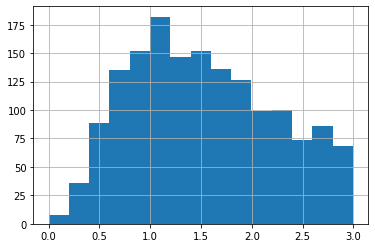

In [175]:
diaries_prop_cut.euc_distance.hist(bins=15)

In [176]:
diaries_prop_cut_min = diaries_prop_cut#[diaries_prop_cut['euc_distance']<2]

In [177]:
diaries_prop_cut_min.shape

(1590, 45)

In [178]:
import pandas as pd
import numpy as np

# Initialize a dictionary to store the SMDs
smd_results = {}

# Loop through each variable and its matched counterpart for global SMD
for original, matched in [('cv', 'matched_cv'), ('glc', 'matched_glc'), ('IOB', 'matched_IOB'), ('start_roc', 'matched_start_roc')]:
    # Calculate mean difference and pooled standard deviation globally
    mean_diff = abs(diaries_prop_cut_min[original].mean() - diaries_prop_cut_min[matched].mean())
    pooled_std = np.sqrt((diaries_prop_cut_min[original].var() + diaries_prop_cut_min[matched].var()) / 2)
    smd = mean_diff / pooled_std
    # Store the results
    smd_results[f"SMD_{original}_{matched}"] = smd

# Display the final SMDs for each variable
smd_results_df = pd.DataFrame([smd_results])
smd_results_df

,SMD_cv_matched_cv,SMD_glc_matched_glc,SMD_IOB_matched_IOB,SMD_start_roc_matched_start_roc
0,0.023334,0.016719,0.089563,0.00659


In [171]:
df = diaries_prop_cut_min.copy()

df['glc_change_diff'] = (df['glc_post_20']-df['glc']) -  (df['matched_glc_20_mins_post']-df['matched_glc'])

df['cv_diff'] = df['cv'] -  df['matched_cv']
df['cv_mean'] = (df['cv'] + df['matched_cv'])/2

df['start_roc_diff'] = df['start_roc'] -  df['matched_start_roc']
df['start_roc_mean'] = (df['start_roc'] + df['matched_start_roc'])/2

df['glc_diff'] = df['glc'] -  df['matched_glc']
df['glc_mean'] = (df['glc'] + df['matched_glc'])/2

df['IOB_diff'] = df['IOB'] -  df['matched_IOB']
df['IOB_mean'] = (df['IOB'] + df['matched_IOB'])/2

df.dropna(subset=['glc_change_diff'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [102]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Define the dependent and independent variables
response = df['glc_change_diff']
predictors = df[[ 'glc_mean', #'morning',
       'glc_diff', 'cv_mean','cv_diff', #'hour_of_day',
       'start_roc_mean', 'start_roc_diff', 'IOB_mean',
       'IOB_diff'
       ]]

#predictors = pd.get_dummies(predictors, drop_first=True)
#predictors.replace({True: 1, False: 0}, inplace=True)

# Add a constant term to the predictors (optional)
predictors = sm.add_constant(predictors)
# Ensure response and predictors are numeric
response = pd.to_numeric(response, errors='coerce')
predictors = predictors.apply(pd.to_numeric, errors='coerce')
#predictors.fillna(-1, inplace=True)
# Define the mixed model
# 'group' is the random effects grouping variable
model = MixedLM(response, predictors, groups=df['ID'])

# Fit the model
result = model.fit()

In [103]:
print(result.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change_diff
No. Observations: 2078    Method:             REML           
No. Groups:       576     Scale:              8.9474         
Min. group size:  1       Log-Likelihood:     -5292.6296     
Max. group size:  20      Converged:          Yes            
Mean group size:  3.6                                        
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
const              -3.846    0.435 -8.844 0.000 -4.698 -2.994
glc_mean            0.207    0.033  6.339 0.000  0.143  0.272
glc_diff           -0.457    0.119 -3.828 0.000 -0.691 -0.223
cv_mean            -0.066    0.012 -5.321 0.000 -0.090 -0.041
cv_diff            -0.047    0.020 -2.393 0.017 -0.086 -0.009
start_roc_mean      8.409    1.254  6.708 0.000  5.952 10.866
start_roc_diff     2

In [30]:
print(result.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change_diff
No. Observations: 1565    Method:             REML           
No. Groups:       508     Scale:              8.1019         
Min. group size:  1       Log-Likelihood:     -3911.6004     
Max. group size:  18      Converged:          Yes            
Mean group size:  3.1                                        
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
const             -3.527    0.487 -7.243 0.000  -4.482 -2.573
glc_mean           0.172    0.037  4.647 0.000   0.099  0.244
glc_diff          -0.721    0.433 -1.664 0.096  -1.569  0.128
cv_mean           -0.063    0.016 -3.850 0.000  -0.096 -0.031
cv_diff           -0.056    0.062 -0.901 0.367  -0.178  0.066
start_roc_mean     8.755    1.596  5.487 0.000   5.628 11.883
start_roc_diff   -10

In [180]:
# Define the variables you care about
features = ['glc', 'start_roc', 'cv', 'IOB']

# Create exercise rows
exercise_df = diaries_prop_cut_min[['ID'] + features].copy()
exercise_df['exercise'] = 1

# Create control (matched) rows
matched_df = diaries_prop_cut_min[['ID'] + [f'matched_{v}' for v in features]].copy()
matched_df.columns = ['ID'] + features  # Rename to same as exercise_df
matched_df['exercise'] = 0

# Combine both
long_df = pd.concat([exercise_df, matched_df], ignore_index=True)


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X = long_df[features]
y = long_df['exercise']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred)

print(f"ROC-AUC: {auc:.3f}")


ROC-AUC: 0.548


In [182]:
diaries_prop_cut_min.to_csv('../../data/tidy/paired_data/combined_with_knn.csv', index=False)

In [183]:
diaries_prop_cut_min

,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,time_of_day,...,cv_std,IOB_std,euc_distance,matched_time,matched_glc,matched_start_roc,matched_IOB,matched_cv,matched_glc_20_mins_post,hypo
0,helm_1,2020-05-14 09:57:57,30.0,0.0,Study Video,2020-05-14 10:27:57,5.0,14.0,3.0,morning,...,-3.714549,-3.989872,0.781113,2020-05-14 07:36:00,12.89,0.014,0.0,1.407161,12.56,False
1,helm_1,2020-05-21 21:29:02,30.0,0.0,Study Video,2020-05-21 21:59:02,5.0,21.0,3.0,evening,...,0.349794,-3.989872,1.1546,2020-05-12 18:11:00,11.33,0.047,0.0,7.18217,16.67,False
2,helm_1,2020-05-30 17:29:05,28.0,1.0,Jogging/Running (Indoor or Outdoor),2020-05-30 17:57:05,5.0,30.0,5.0,evening,...,-0.305115,-2.284310,1.495421,2020-06-06 19:22:00,13.17,-0.008,0.358333,5.854307,12.94,False
4,helm_4,2020-01-11 07:23:10,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 07:43:10,1.0,11.0,5.0,morning,...,-3.259581,-1.575845,0.51042,2020-01-19 22:46:00,10.83,-0.0195,2.1,2.349265,16.44,False
5,helm_4,2020-01-11 14:25:38,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 14:45:38,1.0,11.0,5.0,afternoon,...,-3.213382,-3.989872,1.024098,2020-01-19 08:01:00,11.89,-0.022,0.0,2.22071,10.89,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,dexip_531,2021-11-12 09:25:00,20.0,1.0,Cycling,2021-11-12 09:45:00,11.0,12.0,4.0,morning,...,-3.079412,-2.123803,2.527306,2021-11-15 23:39:00,10.11,-0.011,2.927954,3.749267,11.28,False
2137,dexip_535,2021-10-07 17:30:00,15.0,0.0,Walking,2021-10-07 17:45:00,10.0,7.0,3.0,evening,...,4.907000,-0.589242,1.203152,2021-10-11 08:15:00,11.83,0.061,2.520617,15.697718,10.28,False
2138,dexip_535,2021-10-15 12:15:00,20.0,0.0,Walking,2021-10-15 12:35:00,10.0,15.0,4.0,afternoon,...,-0.872107,-2.457490,2.397658,2021-10-10 23:45:00,13.44,0.0165,0.822,8.138411,10.39,False
2139,dexip_540,2021-05-15 20:30:00,10.0,0.0,Running/Jogging,2021-05-15 20:40:00,5.0,15.0,5.0,evening,...,-0.243607,-3.989872,1.146792,2021-05-13 09:25:00,12.5,-0.075,0.0,6.245464,15.00,False


In [ ]:
diaries_prop = pd.read_csv('../../data/tidy/paired_data/combined_on_prop_score.csv')

In [ ]:
diaries_prop['matched_time'] = pd.to_datetime(diaries_prop['matched_time'])

In [ ]:
# Assuming 'matched_time' is in datetime format and 'duration' is in minutes
diaries_prop['matched_final_time_plus_20'] = diaries_prop['matched_time'] + pd.to_timedelta(diaries_prop['duration'] + 20, unit='m')


In [ ]:
diaries_prop.propensity_diff.unique()

array([2.509223767200447e-06, 6.218340356002605e-07,
       1.5463495781100484e-05, ..., 8.197350349001264e-07,
       2.010170957999699e-06, None], dtype=object)

In [ ]:
cgm_ins

,time,ID,glc,avg_glucose,sd_glucose,time_below_3.9,time_3.9_to_10,time_above_10,hbgi,glc_20_min_ago,start_roc,IOB,glc_post_20
0,2020-09-29 00:02:00,helm_1719,7.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.61
1,2020-09-29 00:07:00,helm_1719,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.56
2,2020-09-29 00:12:00,helm_1719,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50
3,2020-09-29 00:17:00,helm_1719,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.44
4,2020-09-29 00:22:00,helm_1719,7.61,NaN,NaN,NaN,NaN,NaN,NaN,7.78,-0.0085,NaN,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148839,2020-06-07 23:51:00,helm_498,7.39,9.115385,0.725036,0.0,1.0,0.0,5.169886,9.33,-0.0970,0.090867,6.78
7148840,2020-06-07 23:51:00,helm_498,7.39,9.115385,0.725036,0.0,1.0,0.0,5.169886,9.33,-0.0970,0.425833,NaN
7148841,2020-06-07 23:56:00,helm_498,6.78,8.791667,0.918515,0.0,1.0,0.0,4.381668,9.22,-0.1220,0.528587,NaN
7148842,2020-06-07 23:56:00,helm_498,6.78,8.791667,0.918515,0.0,1.0,0.0,4.381668,9.22,-0.1220,0.075200,NaN


In [ ]:
diaries_prop.sort_values(['ID', 'final_time_plus_20'], inplace=True)
diaries_prop.dropna(subset=['final_time_plus_20'], inplace=True)
cgm_ins.sort_values(['ID', 'time'], inplace=True)

In [ ]:
# Initialize an empty list to collect results for each group
merged_results = []

for participant_id in diaries_prop['ID'].unique():
    # Filter the data for the current participant
    diaries_subset = diaries_prop[diaries_prop['ID'] == participant_id]

    cgm_subset = cgm_ins[cgm_ins['ID'] == participant_id]
    
    merged_results.append(pd.merge_asof(diaries_subset, cgm_subset[['time', 'ID', 'glc']], left_on='final_time_plus_20', right_on='time', by='ID', suffixes=['', 'matched_glc_post_20'], direction='forward', tolerance=pd.Timedelta('20m')))

# Concatenate the results into a single DataFrame
final_merged_results = pd.concat(merged_results)


In [ ]:
final_merged_results

,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,time_of_day,...,matched_IOB,matched_avg_glucose,matched_sd_glucose,matched_time_below_3.9,matched_time_3.9_to_10,matched_time_above_10,matched_start_roc,final_time_plus_20,timematched_glc_post_20,glcmatched_glc_post_20
0,dexip_100,2021-08-12 16:48:00,15.00,1.0,Running/Jogging,2021-08-12 17:03:00,8.0,12.0,3.0,afternoon,...,0.000000,6.805833,0.745916,0.000000,1.000000,0.0,0.0195,2021-08-11 00:26:00,2021-08-11 00:26:00,7.61
1,dexip_100,2021-08-10 13:06:00,20.00,0.0,Walking,2021-08-10 13:26:00,8.0,10.0,1.0,afternoon,...,0.000000,5.680000,0.557739,0.000000,1.000000,0.0,0.0000,2021-08-11 07:12:00,2021-08-11 07:16:00,5.61
2,dexip_100,2021-08-11 16:35:00,15.00,0.0,Running/Jogging,2021-08-11 16:50:00,8.0,11.0,2.0,afternoon,...,9.750000,6.148333,0.262707,0.000000,1.000000,0.0,-0.0080,2021-08-12 12:22:00,2021-08-12 12:22:00,6.00
3,dexip_100,2021-08-15 23:22:51,2.15,NaN,RUNNING,2021-08-15 23:25:00,8.0,15.0,6.0,evening,...,11.000000,7.255000,0.174382,0.000000,1.000000,0.0,0.0140,2021-08-13 11:19:09,2021-08-13 11:22:00,7.72
4,dexip_100,2021-08-12 20:23:00,25.00,1.0,Video Games,2021-08-12 20:48:00,8.0,12.0,3.0,evening,...,0.000000,5.555000,1.261575,0.000000,1.000000,0.0,0.0750,2021-08-14 18:32:00,2021-08-14 18:32:00,5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,helm_988,2021-03-31 18:55:02,40.00,0.0,grocery shopping,2021-03-31 19:35:02,3.0,31.0,2.0,evening,...,0.392000,5.596667,0.160756,0.000000,1.000000,0.0,0.0080,2021-04-12 20:16:00,2021-04-12 20:16:00,4.67
26,helm_988,2021-04-09 14:18:55,19.00,0.0,Outdoor Chores,2021-04-09 14:37:55,4.0,9.0,4.0,afternoon,...,0.387000,7.699167,0.160989,0.000000,1.000000,0.0,-0.0165,2021-04-14 13:21:00,2021-04-14 13:22:00,5.89
27,helm_988,2021-04-07 11:52:43,25.00,1.0,"Walking, Dog Walking",2021-04-07 12:17:43,4.0,7.0,2.0,morning,...,0.000000,5.764167,0.094143,0.000000,1.000000,0.0,0.0030,2021-04-15 08:02:00,2021-04-15 08:02:00,4.00
28,helm_988,2021-03-28 15:00:40,25.00,0.0,grocery shopping,2021-03-28 15:25:40,3.0,28.0,6.0,afternoon,...,0.297500,3.750769,0.451211,0.615385,0.384615,0.0,0.0555,2021-04-15 11:52:00,2021-04-15 11:52:00,7.28


In [ ]:
final_merged_results.to_csv('../../data/tidy/paired_data/final_merged_results.csv', index=False)